In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import scikitplot as skplt

/home/costa/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:232: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
data = pd.read_csv("creditcard.csv")

The data consists of 28 variables (V1, …, V28), an “Amount” field a “Class” field and the “Time” field. We do not know the exact meanings of the variables (due to privacy concerns). The Class field takes values 0 (when the transaction is not fraudulent) and value 1 (when a transaction is fraudulent). The data is unbalanced: the number of non-fraudulent transactions (where Class equals 0) is way more than the number of fraudulent transactions (where Class equals 1). Furthermore, there is a Time field. Further inspection shows that these are integers, starting from 0.

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
Counter(data['Class'])

Counter({0: 284315, 1: 492})

In [5]:
# Only use the 'Amount' and 'V1', ..., 'V28' features
features = ['Amount'] + ['V%d' % number for number in range(1, 29)]

# The target variable which we would like to predict, is the 'Class' variable
target = 'Class'

# Now create an X variable (containing the features) and an y variable (containing only the target variable)
X = data[features]
y = data[target]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
print('Original dataset shape %s' % Counter(y_train))

Original dataset shape Counter({0: 199019, 1: 345})


In [8]:
# use smote+enn method for resampling
sme = SMOTEENN(random_state=42)

In [9]:
X_res, y_res = sme.fit_resample(X, y)

In [10]:
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 284307, 0: 283418})


In [11]:
# use randomforest algorithm for interpretation of the variables
clf = RandomForestClassifier(n_estimators=100, n_jobs = -1)

In [12]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Feature ranking:
1. feature 17 (0.185737)
2. feature 14 (0.111694)
3. feature 12 (0.097977)
4. feature 16 (0.080122)
5. feature 10 (0.079236)
6. feature 11 (0.076123)
7. feature 18 (0.032412)
8. feature 9 (0.032390)
9. feature 4 (0.028976)
10. feature 7 (0.028119)
11. feature 26 (0.023066)
12. feature 6 (0.018743)
13. feature 3 (0.017197)
14. feature 21 (0.015806)
15. feature 2 (0.015359)
16. feature 8 (0.015134)
17. feature 27 (0.013948)
18. feature 20 (0.013852)
19. feature 1 (0.013493)
20. feature 15 (0.012600)
21. feature 19 (0.012580)
22. feature 22 (0.011014)
23. feature 0 (0.010583)
24. feature 28 (0.010565)
25. feature 13 (0.010451)
26. feature 5 (0.009957)
27. feature 24 (0.007691)
28. feature 25 (0.007643)
29. feature 23 (0.007530)


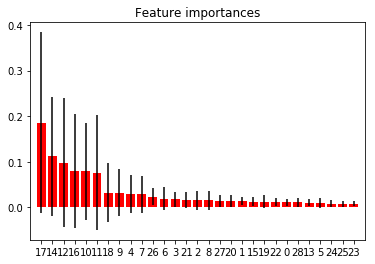

In [13]:
# Plot the feature importances of the forest
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [14]:
# check test results
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.94      0.75      0.83       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.97      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443



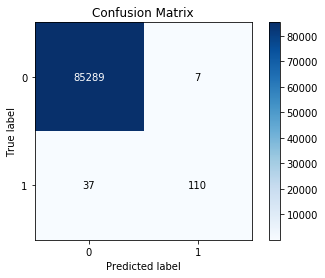

In [18]:
skplt.metrics.plot_confusion_matrix(y_test, clf.predict(X_test))
plt.show()

The classification report shows that we can make perfect predictions for non-fraudulent credit card transactions because the precision and recall are 100%.

For fraudulent credit card transactions, we are able to identify 75% of the cases in our test dataset. Among our predicted fraudulent transactions, 94% of them are actual fraudulent transactions.

Overall, it is argubly a good prediction.

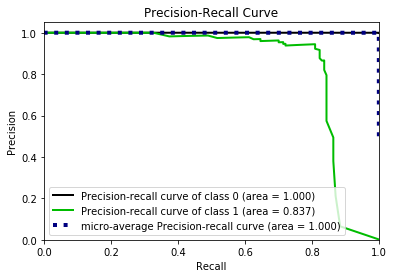

In [19]:
skplt.metrics.plot_precision_recall(y_test, clf.predict_proba(X_test))
plt.show()

The precision-recall curve of class 1 is close to 1 which means good result

/home/costa/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


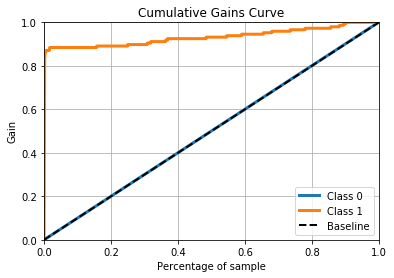

In [21]:
skplt.metrics.plot_cumulative_gain(y_test, clf.predict_proba(X_test))
plt.show()

The cumulative gains curve shows that if we target the top 1%-2% of the fraudulent probabilies, we can identify 83% of the fraudulent transactions